In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import astropy.constants as const
import astropy.units as u
%matplotlib inline

In [8]:
def random_background(object_count=100, max_impact=150):
    
    # Create a list of objects behind the lensing mass, each with randomized brightness and relative position
    background_objects = []
    for i in range(0, object_count):
        new_object = { 
            'abs_mag': -30 + (random.random() * 20), 
            'distance': 1000 + (random.random() * 9000), 
            'impact': random.random() * max_impact,
            'theta': random.random() * 2 * np.pi 
        }
        new_object['x'] = new_object['impact'] * np.cos(new_object['theta'])
        new_object['y'] = new_object['impact'] * np.sin(new_object['theta'])
        background_objects.insert(0, new_object)
        
    return pd.DataFrame(background_objects)

In [9]:
data_frame = random_background()
data_frame

,abs_mag,distance,impact,theta,x,y
0,-24.844208,3386.318523,102.331670,5.548317,75.921849,-68.612269
1,-26.400792,9947.619166,145.391886,4.413444,-42.819642,-138.943438
2,-15.220100,8709.819550,14.980427,5.507958,10.699954,-10.484474
3,-12.406295,1857.953199,80.599315,0.277679,77.511906,22.094206
4,-23.030743,3001.636169,123.334845,3.216046,-122.993160,-9.174232
...,...,...,...,...,...,...
95,-26.102870,5349.952911,35.074142,4.799479,3.050746,-34.941213
96,-24.032888,4022.235349,49.279565,1.956763,-18.551521,45.654316
97,-18.999559,5426.018595,17.429131,1.834803,-4.548138,16.825250
98,-24.519772,9762.857080,47.947321,1.070522,22.998707,42.071428


In [7]:
def lens(beta, mass, lens_distance, source_distance):
    
    lens_to_source = source_distance - lens_distance
    
    #surface_mass_density = mass / 
    
    #critical_mass_surface_density = (source_distance * (const.c ** 2)) / (lens_to_source * lens_distance * 4 * np.pi * const.G)
    
    #print(critical_mass_surface_density.decompose())
    
    #convergence = surface_mass_density / critical_mass_surface_density
    
    # Calculate the einstein radius (angle of theta when source is directly behind lens)
    theta_E = (np.sqrt((4 * const.G * mass * lens_to_source) / ((const.c ** 2) * lens_distance * source_distance)).decompose() * u.rad)
    
    #print(theta_E.to(u.arcsec))
    
    theta_1 = 0.5 * (beta + np.sqrt((beta ** 2) + (4 * (theta_E ** 2))))
    theta_2 = 0.5 * (beta - np.sqrt((beta ** 2) + (4 * (theta_E ** 2))))

    return [theta_E, theta_1, theta_2]

3.5679690075350905 arcsec
-1.894511510604416e-09 arcsec / rad
-10313240.312354816 arcsec / rad
3.45960037725565e-05 rad
3.56796900753509 arcsec


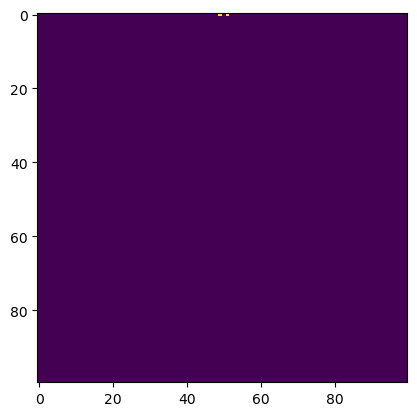

In [18]:
scale = 100
image_data = np.zeros((scale, scale))

thetas = lens(0 * u.arcsec, 6 * (10 ** 12) * const.M_sun, 1184.6 * u.Mpc, 1713.4 * u.Mpc)
image_radius = thetas[0] * 2
object_phi = 3 * np.pi / 2
object_y1 = (np.abs(thetas[1]) / image_radius) * scale * np.sin(object_phi) * np.sign(thetas[1])
object_y2 = (np.abs(thetas[2]) / image_radius) * scale * np.sin(object_phi) * np.sign(thetas[2])
object_x1 = (np.abs(thetas[1]) / image_radius) * scale * np.cos(object_phi) * np.sign(thetas[1])
object_x2 = (np.abs(thetas[2]) / image_radius) * scale * np.cos(object_phi) * np.sign(thetas[2])
image_data[int(object_x1), int(object_y1)] = 256
image_data[int(object_x2), int(object_y2)] = 256
print(object_x1)
print(object_y1)
print(image_radius)
print(thetas[1])

image_data
plt.imshow(image_data);